# Prevalence plots: Covid < 12 weeks ago 

This notebook contains a series of heatmaps to visualise patterns of self reported symptoms within clusters identified by Latent Class Analysis (LCA).

The color scale in each figure represents the proportion of participants within each cluster that reported each symptom. Cluster sizes are all $\geq$ 5% of study size. 

In [1]:
import os
import pandas as pd
%run llc_0028_evalfuncs_syntax_v1.ipynb

In [2]:
cohort2num = {'bcs70':1,
              'bib':2,
              'mcs':3,
              'ncds':4,
              'nextstep':5,
              'nhsd46':6,
              'track19':7,
              'twins':8,
              'alspac':9,
                }

In [3]:
os.chdir('S:/LLC_0028/data/lca_results/')
results = pd.read_csv('./llc_0028_bestparams_lca_l12.csv',index_col=0)

In [4]:
def plot_prevalence(study, params, alg, f, covid_status=1, core=False):
    
    if core:
        
        study_f=study+'_c'
        
    else:
        
        study_f = study

    clusters = pd.read_csv(f)

    dta = pd.read_csv(f'../harmonised_all/llc_0028_full_harmonised_data.csv', index_col=0)
    
    if study=='pooled':
        
        dta=dta.loc[dta.covid_status==covid_status]
        
    else:
        dta = dta.loc[(dta.study==study) & (dta.covid_status==covid_status)]


    
    if core:
        
        core_symp = ['fever','cough','throat',
            'chest_tight','nose','aches',
             'fatigue', 'diarrhoea','smell_taste',
            'nausea_vomit','rash','sneezing',
             'headache','concentrating','memory']
        
        dta = dta[core_symp]

    labels = clusters[f'lc{params}'].values

    dta['cluster'] = labels


    prevalence = pd.DataFrame(index = [c for c in dta.columns if c not in\
                                       ['LLC_0028_stud_id', 'cluster',
                                                        'study','age','sex','ethnicity_3',
                                                        'ethnicity_6','ethnicity_7',
                                                        'covid_status', 'symptom_date',
                                                        'EHR_COVIDdate', 'EHRdata_source',
                                       'self_report_status','ehr_status']])
    sizes = []
    
    for c in dta.cluster.unique():

        clust = dta.loc[dta.cluster==c]
        clust = clust.drop([c for c in clust.columns if c in \
                            ['LLC_0028_stud_id', 'cluster',
                                                        'study','age','sex','ethnicity_3',
                                                        'ethnicity_6','ethnicity_7',
                                                        'covid_status', 'symptom_date',
                                                        'EHR_COVIDdate', 'EHRdata_source',
                            'self_report_status','ehr_status']], axis=1)
        
        #print(clust.columns)

        prevalence[c] = clust.describe().T['mean'].values 

        sizes.append(clust.shape[0]/dta.shape[0])

    prevalence = prevalence.T
    prevalence['% size'] = sizes
    prevalence = prevalence.T

    fig,ax = plt.subplots(figsize=(8,8))

    im = ax.imshow(prevalence.values, aspect='auto', cmap='viridis')

        
    plt.colorbar(im)
    plt.xlabel('cluster', fontsize=14)
    plt.ylabel('symptom', fontsize=14)

    if core:
        plt.suptitle(study.upper() + ' ' + alg.upper() + ' ' + 'core' , fontsize=16)
    else:
        plt.suptitle(study.upper() + ' ' + alg.upper() + ' ' + 'maximal' , fontsize=16)
    
    ax.set_yticks(np.arange(prevalence.shape[0]))
    ax.set_yticklabels(prevalence.index.values)
    
    plt.tight_layout()
    
    plt.savefig(f'./figures/llc_0028_{study_f}{alg}prev_output_{covid_status}_v2.png')

    plt.show()
    
    return prevalence

In [5]:
results

,param,status,study,type
0,2.0,l12,ncds,core
1,2.0,l12,ncds,maximal
2,2.0,l12,mcs,core
3,2.0,l12,mcs,maximal
4,2.0,l12,bcs70,core
5,2.0,l12,bcs70,maximal
6,2.0,l12,nextstep,core
7,2.0,l12,nextstep,maximal
8,2.0,l12,track19,core
9,2.0,l12,track19,maximal


## ALSPAC 

## BIB 

## NCDS 

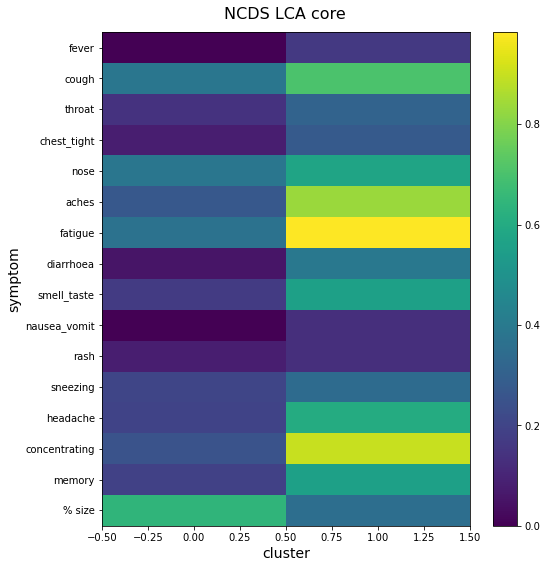

In [6]:
study = 'ncds'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

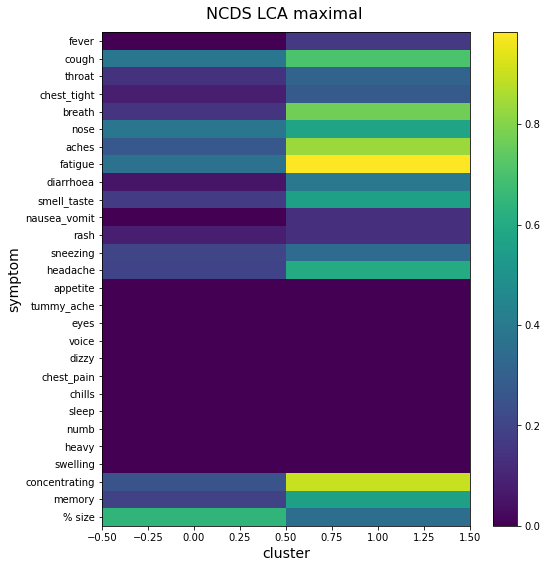

In [7]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## MCS 

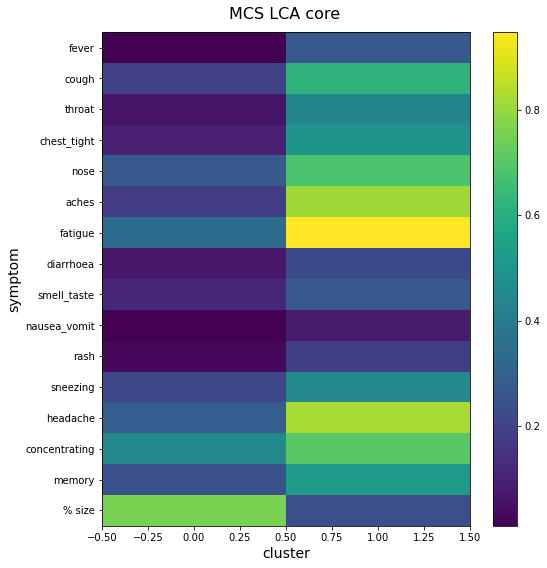

In [8]:
study = 'mcs'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

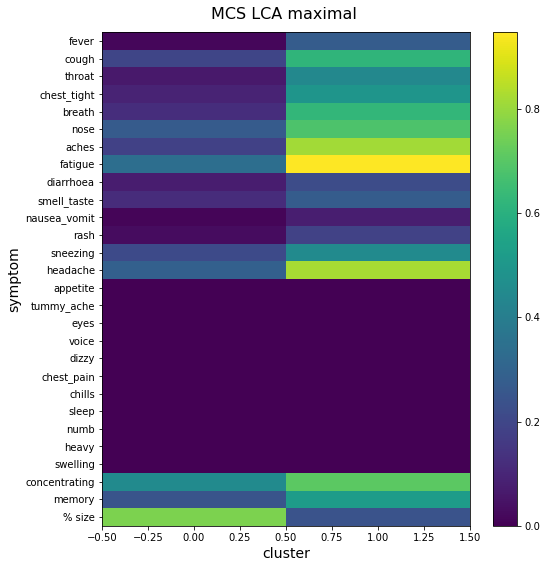

In [9]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## BCS70 

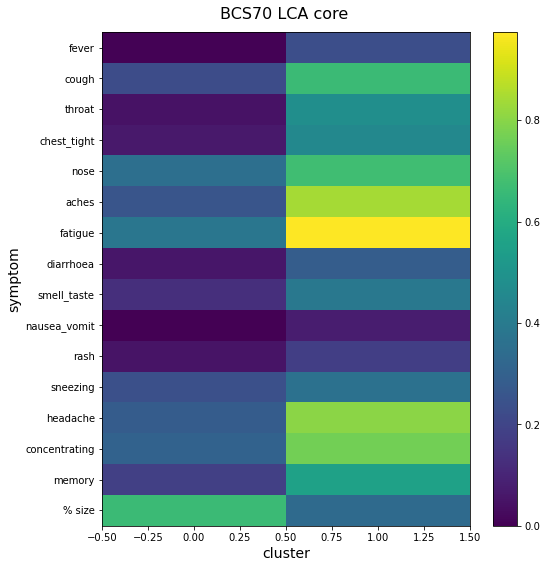

In [10]:
study = 'bcs70'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

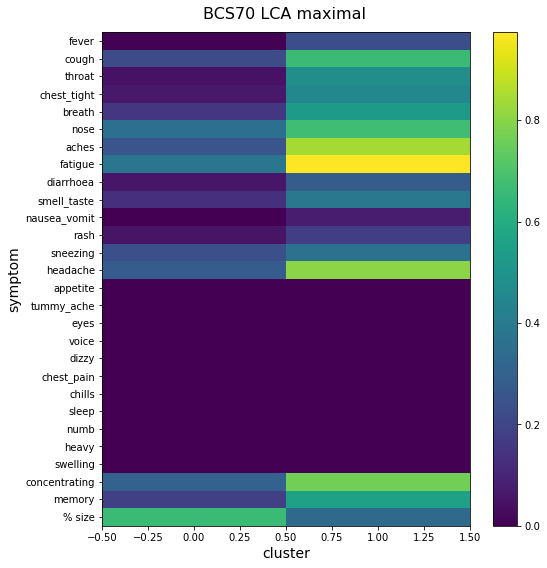

In [11]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## TWINS 

## NextStep 

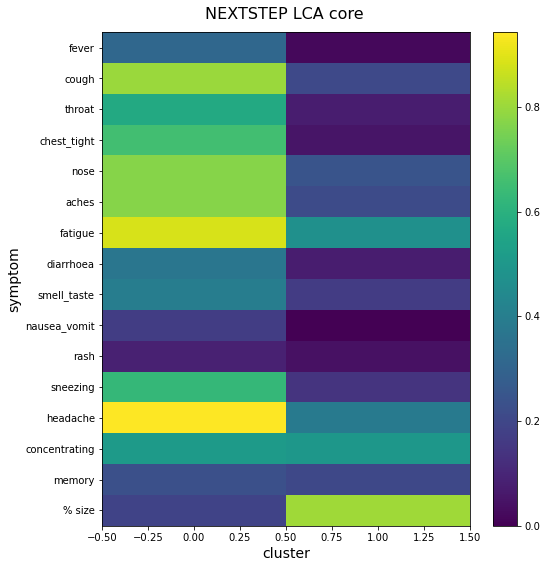

In [13]:
study = 'nextstep'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

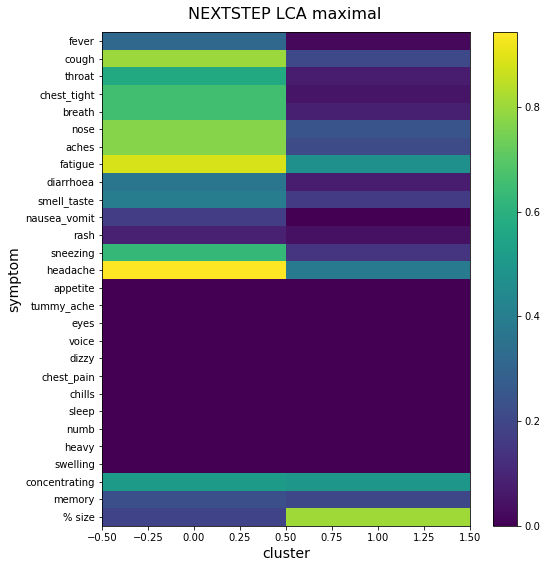

In [14]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## Track 19 

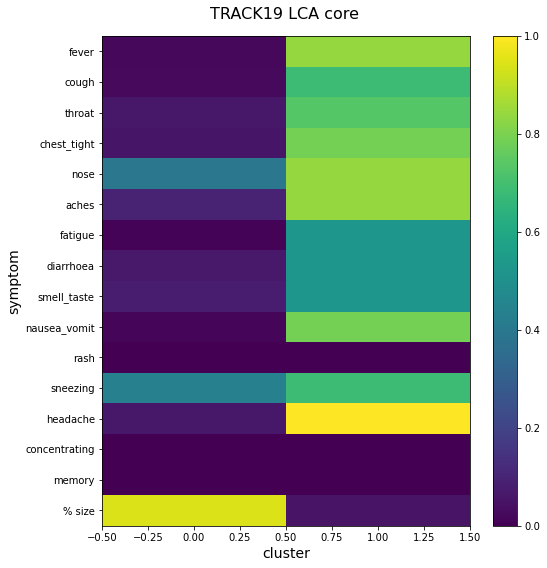

In [15]:
study = 'track19'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

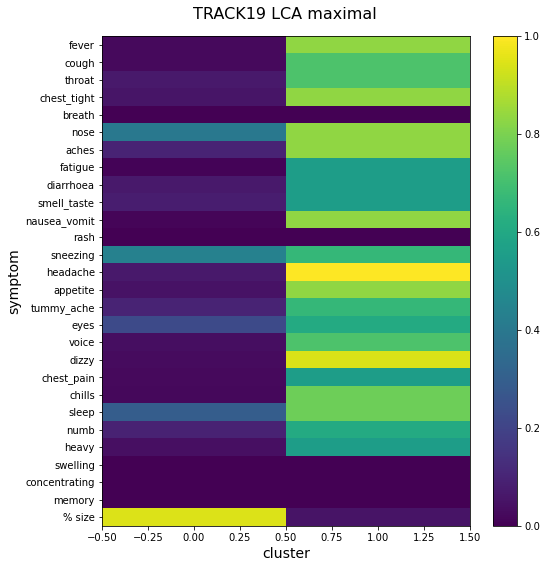

In [16]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## NHSD 46 

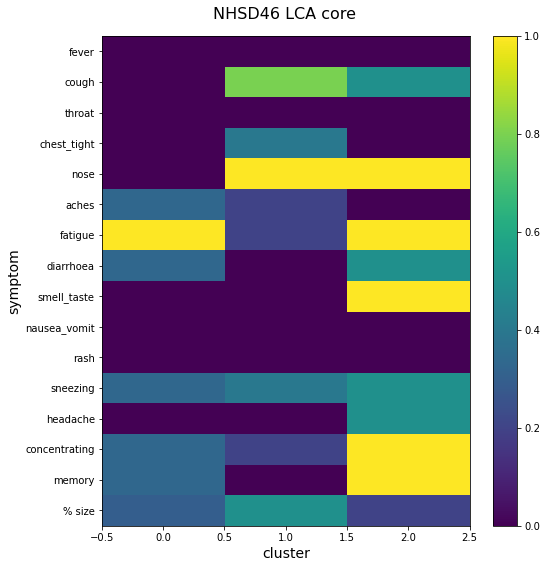

In [17]:
study = 'nhsd46'

f = f'core_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

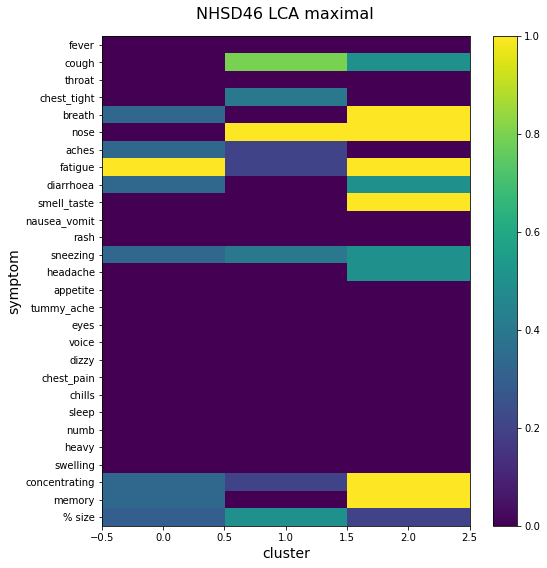

In [18]:
f = f'maximal_cohort_l12_{cohort2num[study]}_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)

## Pooled 

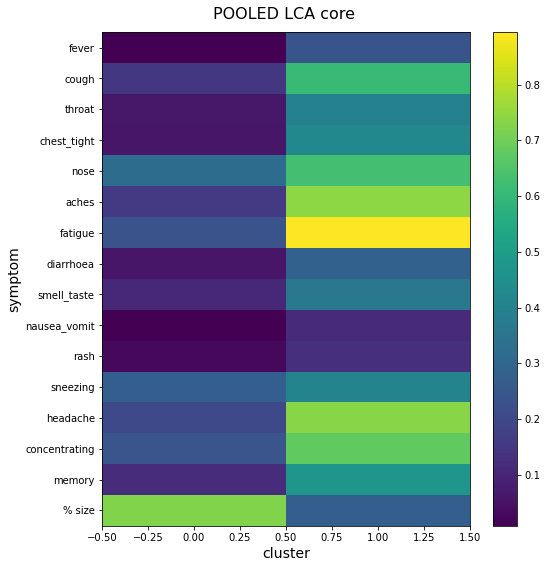

In [19]:
study = 'pooled'

f = f'core_pooled_l12_classes.csv'

params = results.loc[(results.study==study) & (results.type=='core')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=True)

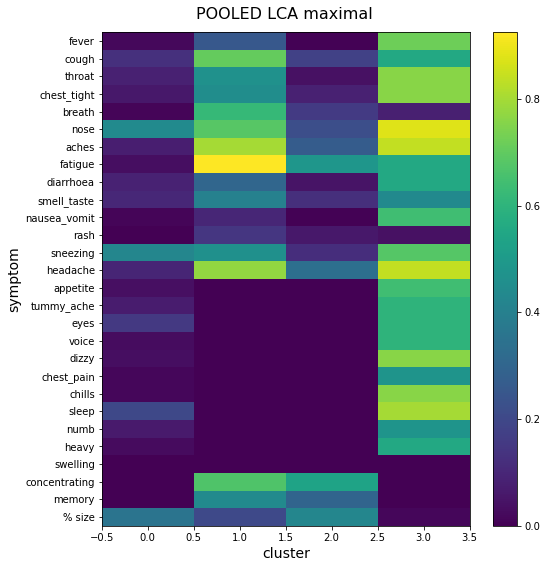

In [20]:
f = f'maximal_pooled_l12_classes.csv'

params = results.loc[(results.study==study) & (results.type=='maximal')].param.iloc[0]

p = plot_prevalence(study, str(int(params)), 'lca', f,  core=False)